In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
def model(x, w, b):
    raw = np.dot(x, w) + b
    return sigmoid(raw)

In [4]:
def cost(y_pred, y):
    err = y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)
    return -err.mean() / 2

In [5]:
def gradient(x, y, w, b):
    pred = model(x, w, b)
    err = (pred - y).reshape(-1, 1)
    wGrad = np.mean(err * x, axis = 0)
    bGrad = np.mean(err)
    return wGrad, bGrad

In [6]:
def gradientDescent(x, y, w, b, alpha, iterCount):
    for i in range(iterCount):
        wGrad, bGrad = gradient(x, y, w, b)
        w = w - alpha * wGrad
        b = b - alpha * bGrad
        if i % 1000 == 0:
            pred = model(x, w, b)
            c = cost(pred, y)
            print(f"Iteration {i:4d}: Cost {c}   ")
    return w, b

In [7]:
xTrain = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
yTrain = np.array([0, 0, 0, 1, 1, 1])      

w = np.zeros_like(xTrain[0])
b = 0.

alpha = 0.1
iters = 10000

w, b = gradientDescent(xTrain, yTrain, w, b, alpha, iters)
print(f"\nupdated parameters: w:{w}, b:{b}")

Iteration    0: Cost 0.342305234280287   
Iteration 1000: Cost 0.07954888334352285   
Iteration 2000: Cost 0.042300320884650404   
Iteration 3000: Cost 0.02852663639701264   
Iteration 4000: Cost 0.02145379710841   
Iteration 5000: Cost 0.017169238649422786   
Iteration 6000: Cost 0.01430189901106003   
Iteration 7000: Cost 0.01225078480439653   
Iteration 8000: Cost 0.010711851662846446   
Iteration 9000: Cost 0.009515068562054547   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019839


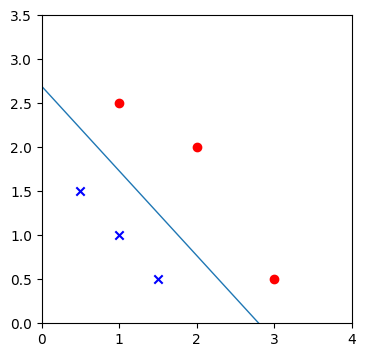

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (4,4))
pos = yTrain == 1
neg = yTrain == 0

ax.scatter(xTrain[pos][:, 0], xTrain[pos][:, 1], marker = 'o', c = "red", label = "y = 1")
ax.scatter(xTrain[neg][:, 0], xTrain[neg][:, 1], marker = 'x', c = "blue", label = "y = 0")
ax.axis([0, 4, 0, 3.5])

x0 = -b / w[0]
x1 = -b / w[1]
ax.plot([0, x1], [x0, 0], lw = 1)

plt.show()